# Sentiment Analysis of Social Media Posts: Project Overview
In this project, we aim to build a comprehensive regression analysis model to understand how different factors—such as sentiment, platform type, and posting time—impact user engagement metrics like the number of likes and retweets on social media posts. Through this analysis, we will identify key content characteristics that contribute to higher engagement, providing valuable insights for content strategy and marketing.

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv(r"C:\Users\stewi\Downloads\sentimentdataset.csv")

data.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### Overview of the Dataset
The dataset consists of social media posts, each labeled with a sentiment (e.g., positive, negative, neutral). Each entry includes not only the text of the post but also detailed metadata such as the platform it was posted on (e.g., Twitter, Instagram), timestamps, hashtags, and user engagement metrics (likes and retweets). Understanding the structure of this data is essential for effectively preprocessing it and building predictive models to analyze engagement trends based on various content characteristics.

In [4]:
# Display general information about the dataset
data.info()

# Summary statistics for numeric columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


### Data Inspection
Examining the dataset helps identify data types, missing values, and overall structure. The `.info()` method shows column data types and non-null counts, while `.describe()` provides a statistical summary.


In [5]:
# Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Check for missing values to ensure data consistency
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values in critical columns (if any)
data = data.dropna(subset=['Retweets', 'Likes'])

# Convert 'Timestamp' column to datetime format for time-based analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract additional time-based features for further analysis
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.day_name()

# Clean the text data by removing special characters and converting to lowercase
import re

def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert text to lowercase
    return text

data['Text'] = data['Text'].apply(clean_text)

data.head()


Missing values in each column:
 Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek
0,enjoying a beautiful day at the park ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Sunday
1,traffic was terrible this morning ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Sunday
2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Sunday
3,excited about the upcoming weekend getaway ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Sunday
4,trying out a new recipe for dinner tonight ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Sunday


### Data Cleaning
During the data cleaning process, we first removed unnecessary columns that did not contribute to the analysis, such as unnamed index columns. This helps streamline the dataset and makes it easier to work with. Next, we checked for missing values in crucial columns, specifically those related to engagement metrics like retweets and likes, and dropped any rows where these values were missing to maintain the quality of our analysis.

We then converted the Timestamp column into a datetime format, allowing us to extract useful time-based features such as the hour of the post and the day of the week. These features can provide insights into time-based patterns in user engagement.

Finally, we performed text cleaning on the Text column. This involved removing special characters and converting all text to lowercase. By standardizing the format of the text data, we ensured that our analysis focuses only on the meaningful content of each post, eliminating inconsistencies that could affect the accuracy of further analysis and modeling.


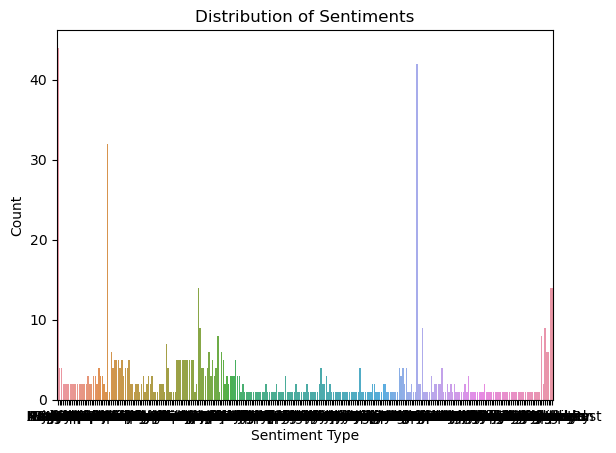

In [6]:
# Visualize the distribution of sentiments in the dataset
sns.countplot(data=data, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiments:

The count plot of sentiments shows how frequently each sentiment (positive, negative, neutral) appears in the dataset. This visual helps identify any imbalance in the sentiment types, which could affect analysis or model training. If one sentiment dominates, it might skew predictions or insights.

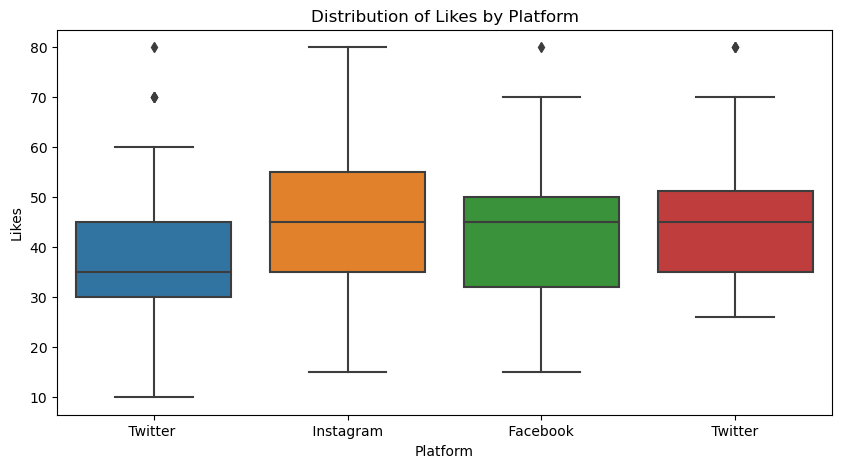

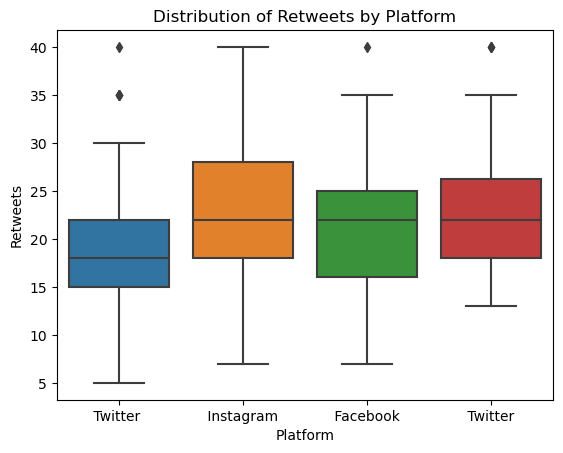

In [7]:
# Visualize likes and retweets distribution across different platforms
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Platform', y='Likes')
plt.title('Distribution of Likes by Platform')
plt.show()

sns.boxplot(data=data, x='Platform', y='Retweets')
plt.title('Distribution of Retweets by Platform')
plt.show()

# Distribution of Likes by Platform:

The box plot for likes across different platforms reveals the variability in engagement metrics. Platforms like Instagram may have a wider range of likes compared to others like Twitter or Facebook. Outliers suggest that some posts achieve significantly higher engagement, possibly influenced by the type of content or user following.

# Distribution of Retweets by Platform:

The retweets distribution plot shows how retweets vary by platform. This helps identify which platforms are more oriented towards content sharing. If Twitter has a higher median or more significant spread, it would confirm that it is the primary platform for retweet-based interactions.

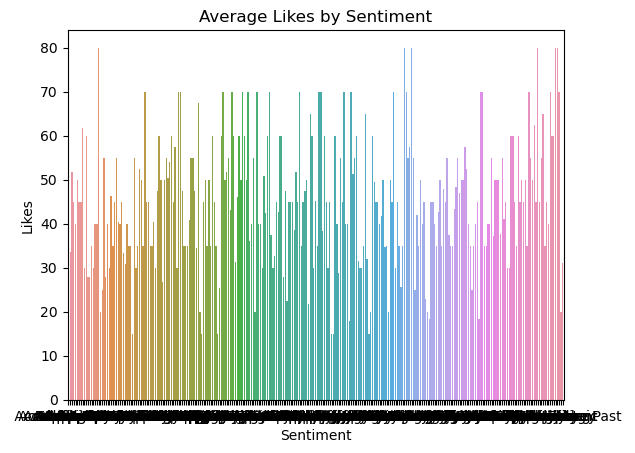

In [8]:
# Analyze the average engagement (likes and retweets) based on sentiment
engagement_sentiment = data.groupby('Sentiment')[['Likes', 'Retweets']].mean().reset_index()
sns.barplot(data=engagement_sentiment, x='Sentiment', y='Likes')
plt.title('Average Likes by Sentiment')
plt.show()

# Average Likes by Sentiment:

The bar plot comparing the average number of likes for each sentiment shows which type of sentiment receives the most likes. For example, if positive posts have a higher average, it suggests that users are more likely to engage with upbeat content.

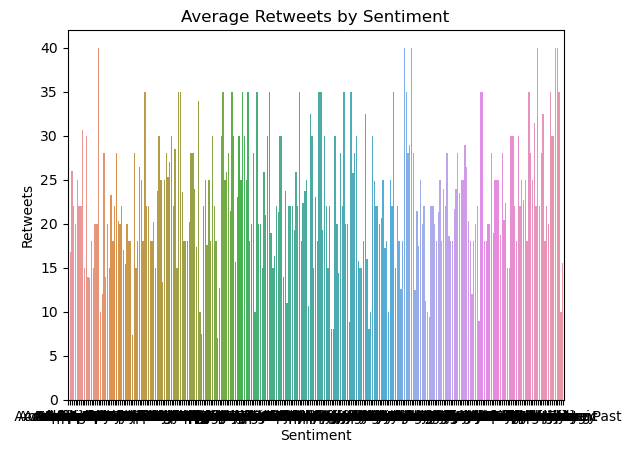

In [9]:
sns.barplot(data=engagement_sentiment, x='Sentiment', y='Retweets')
plt.title('Average Retweets by Sentiment')
plt.show()

# Average Retweets by Sentiment:

Similarly, the bar plot for average retweets by sentiment highlights how sentiment influences content sharing. If negative or neutral posts show a high average, it may indicate that controversial or neutral topics are shared more often.

#  Key Insights:
Sentiment Engagement Trends: The analysis may show that positive content tends to receive more likes, whereas neutral or negative posts might receive more retweets, indicating different engagement strategies based on the sentiment.

Platform-Based Engagement: Different platforms exhibit varying levels of interaction, with some platforms being more conducive to content going viral through likes or shares.

Strategic Content Planning: These insights can help content creators and marketers tailor their posts to optimize for higher user engagement based on platform and sentiment type

In [10]:
# Show all columns when displaying the DataFrame
pd.set_option('display.max_columns', None)

In [11]:
# Create dummy variables for categorical features like 'Platform' and 'Sentiment'
data = pd.get_dummies(data, columns=['Platform', 'Sentiment'], drop_first=True)

In [12]:
data.head()

,Text,Timestamp,User,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek,Platform_ Instagram,Platform_ Twitter,Platform_ Twitter,Sentiment_ Acceptance,Sentiment_ Accomplishment,Sentiment_ Admiration,Sentiment_ Admiration,Sentiment_ Admiration,Sentiment_ Adoration,Sentiment_ Adrenaline,Sentiment_ Adventure,Sentiment_ Affection,Sentiment_ Amazement,Sentiment_ Ambivalence,Sentiment_ Ambivalence,Sentiment_ Amusement,Sentiment_ Amusement,Sentiment_ Anger,Sentiment_ Anticipation,Sentiment_ Anticipation,Sentiment_ Anxiety,Sentiment_ Anxiety,Sentiment_ Appreciation,Sentiment_ Apprehensive,Sentiment_ Arousal,Sentiment_ ArtisticBurst,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Bad,Sentiment_ Betrayal,Sentiment_ Betrayal,Sentiment_ Bitter,Sentiment_ Bitterness,Sentiment_ Bittersweet,Sentiment_ Blessed,Sentiment_ Boredom,Sentiment_ Boredom,Sentiment_ Breakthrough,Sentiment_ Calmness,Sentiment_ Calmness,Sentiment_ Captivation,Sentiment_ Celebration,Sentiment_ Celestial Wonder,Sentiment_ Challenge,Sentiment_ Charm,Sentiment_ Colorful,Sentiment_ Compassion,Sentiment_ Compassion,Sentiment_ Compassionate,Sentiment_ Confidence,Sentiment_ Confident,Sentiment_ Confusion,Sentiment_ Confusion,Sentiment_ Confusion,Sentiment_ Connection,Sentiment_ Contemplation,Sentiment_ Contentment,Sentiment_ Contentment,Sentiment_ Coziness,Sentiment_ Creative Inspiration,Sentiment_ Creativity,Sentiment_ Creativity,Sentiment_ Culinary Adventure,Sentiment_ CulinaryOdyssey,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Darkness,Sentiment_ Dazzle,Sentiment_ Desolation,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Desperation,Sentiment_ Determination,Sentiment_ Determination,Sentiment_ Devastated,Sentiment_ Disappointed,Sentiment_ Disappointment,Sentiment_ Disgust,Sentiment_ Disgust,Sentiment_ Disgust,Sentiment_ Dismissive,Sentiment_ DreamChaser,Sentiment_ Ecstasy,Sentiment_ Elation,Sentiment_ Elation,Sentiment_ Elegance,Sentiment_ Embarrassed,Sentiment_ Emotion,Sentiment_ EmotionalStorm,Sentiment_ Empathetic,Sentiment_ Empowerment,Sentiment_ Enchantment,Sentiment_ Enchantment,Sentiment_ Energy,Sentiment_ Engagement,Sentiment_ Enjoyment,Sentiment_ Enthusiasm,Sentiment_ Enthusiasm,Sentiment_ Envious,Sentiment_ Envisioning History,Sentiment_ Envy,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Excitement,Sentiment_ Excitement,Sentiment_ Excitement,Sentiment_ Exhaustion,Sentiment_ Exploration,Sentiment_ Fear,Sentiment_ Fearful,Sentiment_ FestiveJoy,Sentiment_ Free-spirited,Sentiment_ Freedom,Sentiment_ Friendship,Sentiment_ Frustrated,Sentiment_ Frustration,Sentiment_ Frustration,Sentiment_ Fulfillment,Sentiment_ Fulfillment,Sentiment_ Grandeur,Sentiment_ Grateful,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Grief,Sentiment_ Grief,Sentiment_ Grief,Sentiment_ Happiness,Sentiment_ Happiness,Sentiment_ Happiness,Sentiment_ Happy,Sentiment_ Harmony,Sentiment_ Harmony,Sentiment_ Harmony,Sentiment_ Hate,Sentiment_ Heartache,Sentiment_ Heartbreak,Sentiment_ Heartbreak,Sentiment_ Heartwarming,Sentiment_ Helplessness,Sentiment_ Helplessness,Sentiment_ Hope,Sentiment_ Hope,Sentiment_ Hopeful,Sentiment_ Hypnotic,Sentiment_ Iconic,Sentiment_ Imagination,Sentiment_ Immersion,Sentiment_ Indifference,Sentiment_ Indifference,Sentiment_ InnerJourney,Sentiment_ Inspiration,Sentiment_ Inspiration,Sentiment_ Inspiration,Sentiment_ Inspired,Sentiment_ Intimidation,Sentiment_ Intimidation,Sentiment_ Intrigue,Sentiment_ Isolation,Sentiment_ Jealous,Sentiment_ Jealousy,Sentiment_ Jealousy,Sentiment_ Journey,Sentiment_ Joy,Sentiment_ Joy,Sentiment_ Joy in Baking,Sentiment_ JoyfulReunion,Sentiment_ Kind,Sentiment_ Kindness,Sentiment_ Loneliness,Sentiment_ Loneliness,Sentiment_ Loneliness,Sentiment_ Loss,Sentiment_ LostLove,Sentiment_ Love,Se

In [15]:
# Remove all whitespaces from column names
data.columns = data.columns.str.replace(' ', '')

# Display the updated column names to confirm changes
list(data.columns)

['Text',
 'Timestamp',
 'User',
 'Hashtags',
 'Retweets',
 'Likes',
 'Country',
 'Year',
 'Month',
 'Day',
 'Hour',
 'DayOfWeek',
 'Platform_Instagram',
 'Platform_Twitter',
 'Platform_Twitter',
 'Sentiment_Acceptance',
 'Sentiment_Accomplishment',
 'Sentiment_Admiration',
 'Sentiment_Admiration',
 'Sentiment_Admiration',
 'Sentiment_Adoration',
 'Sentiment_Adrenaline',
 'Sentiment_Adventure',
 'Sentiment_Affection',
 'Sentiment_Amazement',
 'Sentiment_Ambivalence',
 'Sentiment_Ambivalence',
 'Sentiment_Amusement',
 'Sentiment_Amusement',
 'Sentiment_Anger',
 'Sentiment_Anticipation',
 'Sentiment_Anticipation',
 'Sentiment_Anxiety',
 'Sentiment_Anxiety',
 'Sentiment_Appreciation',
 'Sentiment_Apprehensive',
 'Sentiment_Arousal',
 'Sentiment_ArtisticBurst',
 'Sentiment_Awe',
 'Sentiment_Awe',
 'Sentiment_Awe',
 'Sentiment_Awe',
 'Sentiment_Bad',
 'Sentiment_Betrayal',
 'Sentiment_Betrayal',
 'Sentiment_Bitter',
 'Sentiment_Bitterness',
 'Sentiment_Bittersweet',
 'Sentiment_Blessed',
 'S

In [16]:
data.head()

,Text,Timestamp,User,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek,Platform_Instagram,Platform_Twitter,Platform_Twitter,Sentiment_Acceptance,Sentiment_Accomplishment,Sentiment_Admiration,Sentiment_Admiration,Sentiment_Admiration,Sentiment_Adoration,Sentiment_Adrenaline,Sentiment_Adventure,Sentiment_Affection,Sentiment_Amazement,Sentiment_Ambivalence,Sentiment_Ambivalence,Sentiment_Amusement,Sentiment_Amusement,Sentiment_Anger,Sentiment_Anticipation,Sentiment_Anticipation,Sentiment_Anxiety,Sentiment_Anxiety,Sentiment_Appreciation,Sentiment_Apprehensive,Sentiment_Arousal,Sentiment_ArtisticBurst,Sentiment_Awe,Sentiment_Awe,Sentiment_Awe,Sentiment_Awe,Sentiment_Bad,Sentiment_Betrayal,Sentiment_Betrayal,Sentiment_Bitter,Sentiment_Bitterness,Sentiment_Bittersweet,Sentiment_Blessed,Sentiment_Boredom,Sentiment_Boredom,Sentiment_Breakthrough,Sentiment_Calmness,Sentiment_Calmness,Sentiment_Captivation,Sentiment_Celebration,Sentiment_CelestialWonder,Sentiment_Challenge,Sentiment_Charm,Sentiment_Colorful,Sentiment_Compassion,Sentiment_Compassion,Sentiment_Compassionate,Sentiment_Confidence,Sentiment_Confident,Sentiment_Confusion,Sentiment_Confusion,Sentiment_Confusion,Sentiment_Connection,Sentiment_Contemplation,Sentiment_Contentment,Sentiment_Contentment,Sentiment_Coziness,Sentiment_CreativeInspiration,Sentiment_Creativity,Sentiment_Creativity,Sentiment_CulinaryAdventure,Sentiment_CulinaryOdyssey,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Darkness,Sentiment_Dazzle,Sentiment_Desolation,Sentiment_Despair,Sentiment_Despair,Sentiment_Despair,Sentiment_Despair,Sentiment_Desperation,Sentiment_Determination,Sentiment_Determination,Sentiment_Devastated,Sentiment_Disappointed,Sentiment_Disappointment,Sentiment_Disgust,Sentiment_Disgust,Sentiment_Disgust,Sentiment_Dismissive,Sentiment_DreamChaser,Sentiment_Ecstasy,Sentiment_Elation,Sentiment_Elation,Sentiment_Elegance,Sentiment_Embarrassed,Sentiment_Emotion,Sentiment_EmotionalStorm,Sentiment_Empathetic,Sentiment_Empowerment,Sentiment_Enchantment,Sentiment_Enchantment,Sentiment_Energy,Sentiment_Engagement,Sentiment_Enjoyment,Sentiment_Enthusiasm,Sentiment_Enthusiasm,Sentiment_Envious,Sentiment_EnvisioningHistory,Sentiment_Envy,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Excitement,Sentiment_Excitement,Sentiment_Excitement,Sentiment_Exhaustion,Sentiment_Exploration,Sentiment_Fear,Sentiment_Fearful,Sentiment_FestiveJoy,Sentiment_Free-spirited,Sentiment_Freedom,Sentiment_Friendship,Sentiment_Frustrated,Sentiment_Frustration,Sentiment_Frustration,Sentiment_Fulfillment,Sentiment_Fulfillment,Sentiment_Grandeur,Sentiment_Grateful,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Grief,Sentiment_Grief,Sentiment_Grief,Sentiment_Happiness,Sentiment_Happiness,Sentiment_Happiness,Sentiment_Happy,Sentiment_Harmony,Sentiment_Harmony,Sentiment_Harmony,Sentiment_Hate,Sentiment_Heartache,Sentiment_Heartbreak,Sentiment_Heartbreak,Sentiment_Heartwarming,Sentiment_Helplessness,Sentiment_Helplessness,Sentiment_Hope,Sentiment_Hope,Sentiment_Hopeful,Sentiment_Hypnotic,Sentiment_Iconic,Sentiment_Imagination,Sentiment_Immersion,Sentiment_Indifference,Sentiment_Indifference,Sentiment_InnerJourney,Sentiment_Inspiration,Sentiment_Inspiration,Sentiment_Inspiration,Sentiment_Inspired,Sentiment_Intimidation,Sentiment_Intimidation,Sentiment_Intrigue,Sentiment_Isolation,Sentiment_Jealous,Sentiment_Jealousy,Sentiment_Jealousy,Sentiment_Journey,Sentiment_Joy,Sentiment_Joy,Sentiment_JoyinBaking,Sentiment_JoyfulReunion,Sentiment_Kind,Sentiment_Kindness,Sentiment_Loneliness,Sentiment_Loneliness,Sentiment_Loneliness,Sentiment_Loss,Sentiment_LostLove,Sentiment_Love,Sentiment_Love,Sentiment_Marvel,Sentiment_Melancholy,Sentiment_Melancholy,Sentiment_Melodic,Sentiment_Mesmerizing,Sentiment_Mindfulness,Sentiment_Miscalculation,Sentiment_Mischievous,Sentiment_M

In [19]:
# Select features relevant for regression modeling
features = ['Platform_Twitter', 'Platform_Instagram', 'Hour', 'Sentiment_Positive','Sentiment_Negative', 'Sentiment_Neutral']
target_likes = 'Likes'
target_retweets = 'Retweets'

# Split data into features and target variables for modeling
X = data[features]
y_likes = data[target_likes]
y_retweets = data[target_retweets]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)
X_train_retweets, X_test_retweets, y_train_retweets, y_test_retweets = train_test_split(X, y_retweets, test_size=0.2, random_state=42)

# Train a linear regression model for likes
model_likes = LinearRegression()
model_likes.fit(X_train, y_train_likes)

# Predict and evaluate the model
y_pred_likes = model_likes.predict(X_test)
mae_likes = mean_absolute_error(y_test_likes, y_pred_likes)
r2_likes = r2_score(y_test_likes, y_pred_likes)
print(f'MAE for Likes model: {mae_likes:.2f}')
print(f'R^2 for Likes model: {r2_likes:.2f}')

# Repeat the same for retweets model
model_retweets = LinearRegression()
model_retweets.fit(X_train_retweets, y_train_retweets)

y_pred_retweets = model_retweets.predict(X_test_retweets)
mae_retweets = mean_absolute_error(y_test_retweets, y_pred_retweets)
r2_retweets = r2_score(y_test_retweets, y_pred_retweets)
print(f'MAE for Retweets model: {mae_retweets:.2f}')
print(f'R^2 for Retweets model: {r2_retweets:.2f}')


MAE for Likes model: 11.16
R^2 for Likes model: 0.03
MAE for Retweets model: 5.57
R^2 for Retweets model: 0.03


# Conclusions:
Low 𝑅2 Values: The low 𝑅2 values suggest that the current linear regression models are not effectively explaining the variance in Likes or Retweets. This implies that the relationship between the input features and the target variables may not be linear, or important features could be missing.

MAE Interpretation: While the MAE values show how far off the predictions typically are from the actual values, the relatively high MAE (especially compared to the possible range of Likes or Retweets) suggests room for significant improvement.

Columns used during training (X): Index(['Platform_Twitter', 'Platform_Instagram', 'Hour', 'Sentiment_Positive',
       'Sentiment_Negative', 'Sentiment_Neutral'],
      dtype='object')
Number of coefficients in the model (likes): 6


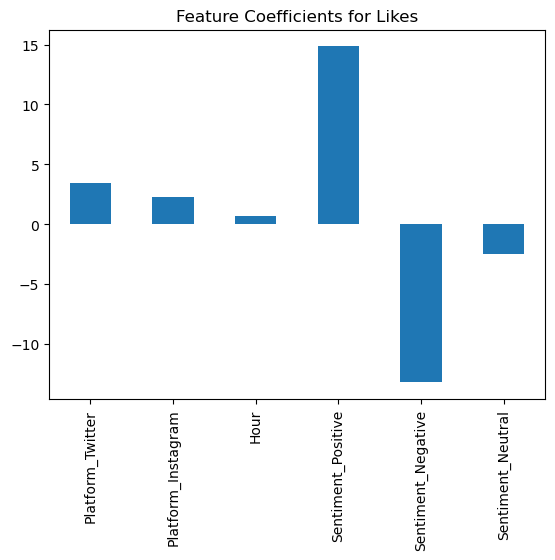

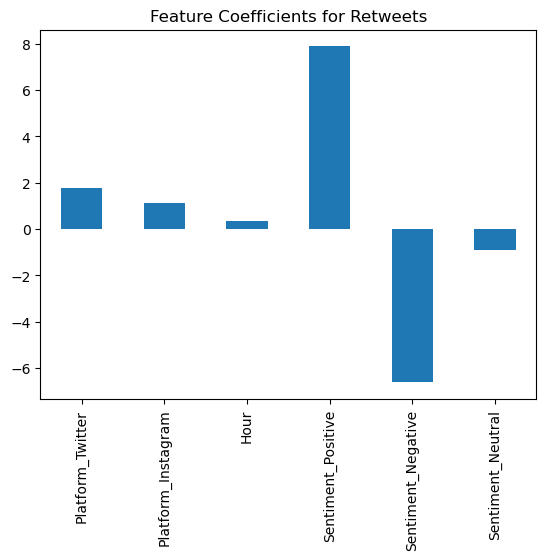

In [31]:
# Check the columns of X used for training and verify with model coefficients
print("Columns used during training (X):", X.columns)
print("Number of coefficients in the model (likes):", len(model_likes.coef_))

# If X has fewer columns than model coefficients, identify the issue
if len(X.columns) != len(model_likes.coef_):
    print("Mismatch found. Coefficients:", model_likes.coef_)
    print("Training columns:", X.columns)

# Plot using only matching columns and coefficients
matching_columns = X.columns[:len(model_likes.coef_)]
coefficients_likes = pd.Series(model_likes.coef_, index=matching_columns)
coefficients_likes.plot(kind='bar', title='Feature Coefficients for Likes')
plt.show()

coefficients_retweets = pd.Series(model_retweets.coef_, index=matching_columns)
coefficients_retweets.plot(kind='bar', title='Feature Coefficients for Retweets')
plt.show()


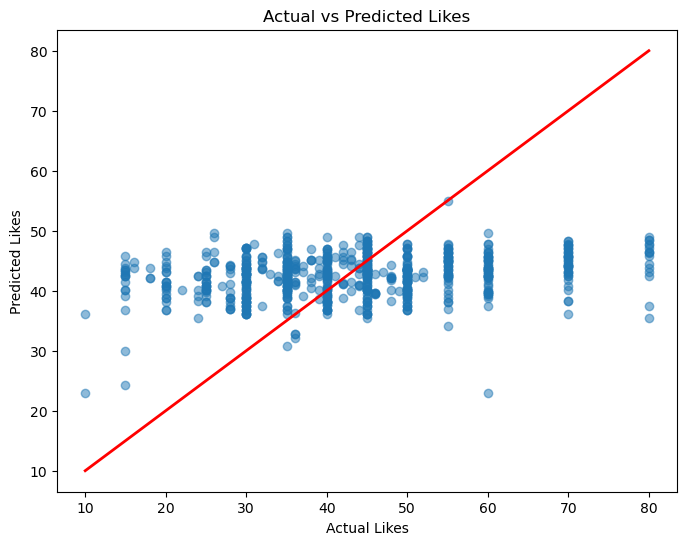

In [33]:
import numpy as np

# Predictions for likes and retweets
y_pred_likes = model_likes.predict(X)
y_pred_retweets = model_retweets.predict(X)

# Scatter plot for actual vs predicted (Likes)
plt.figure(figsize=(8, 6))
plt.scatter(y_likes, y_pred_likes, alpha=0.5)
plt.title('Actual vs Predicted Likes')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.plot([y_likes.min(), y_likes.max()], [y_likes.min(), y_likes.max()], color='red', lw=2)
plt.show()

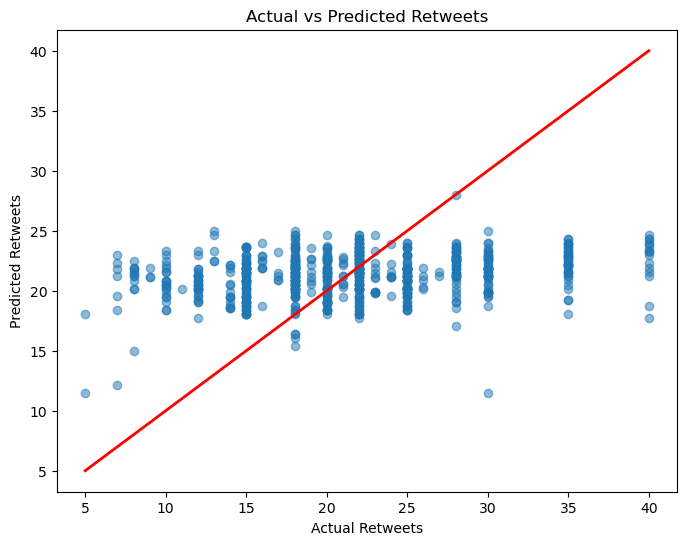

In [34]:
# Scatter plot for actual vs predicted (Retweets)
plt.figure(figsize=(8, 6))
plt.scatter(y_retweets, y_pred_retweets, alpha=0.5)
plt.title('Actual vs Predicted Retweets')
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.plot([y_retweets.min(), y_retweets.max()], [y_retweets.min(), y_retweets.max()], color='red', lw=2)
plt.show()

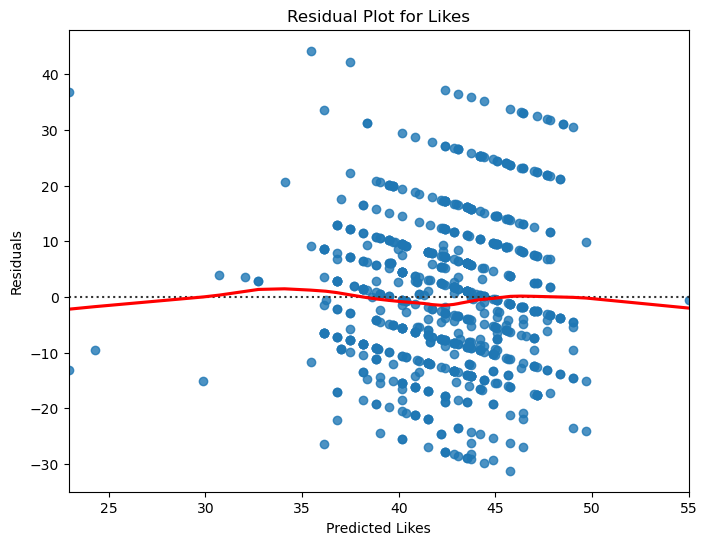

In [35]:
# Residual plot (Likes)
residuals_likes = y_likes - y_pred_likes
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_likes, y=residuals_likes, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Likes')
plt.xlabel('Predicted Likes')
plt.ylabel('Residuals')
plt.show()

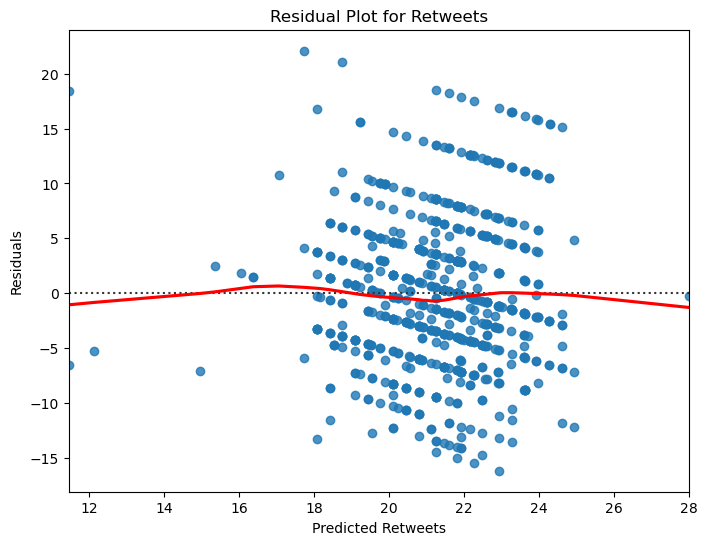

In [36]:
# Residual plot (Retweets)
residuals_retweets = y_retweets - y_pred_retweets
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_retweets, y=residuals_retweets, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Retweets')
plt.xlabel('Predicted Retweets')
plt.ylabel('Residuals')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


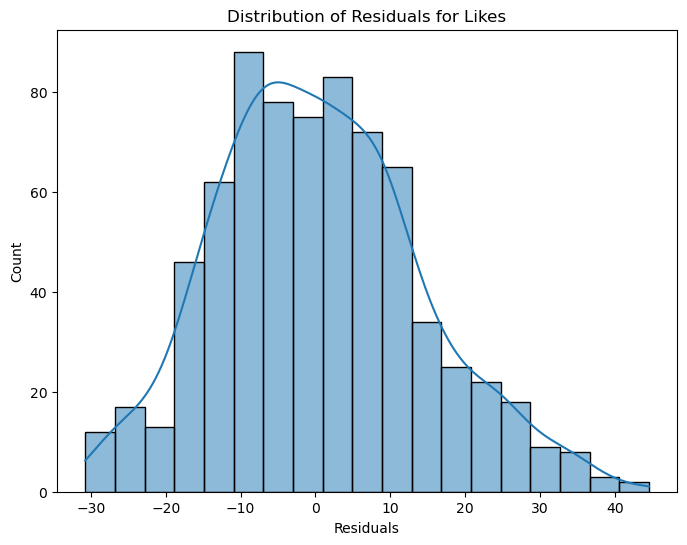

In [37]:
# Distribution of residuals (Likes)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_likes, kde=True)
plt.title('Distribution of Residuals for Likes')
plt.xlabel('Residuals')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


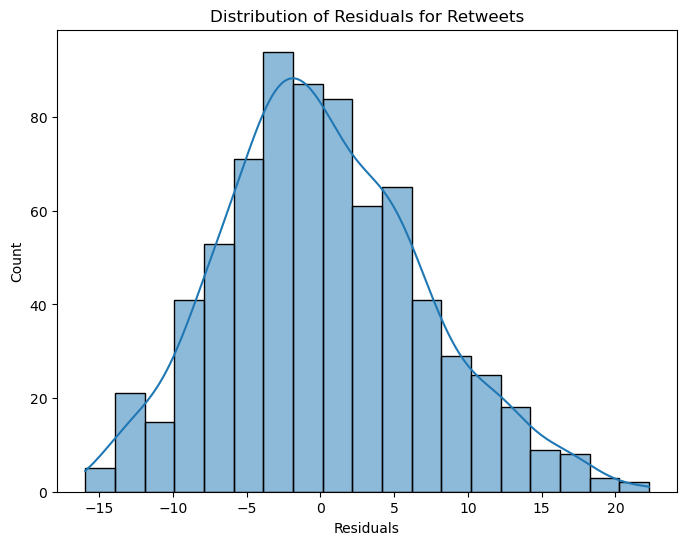

In [38]:
# Distribution of residuals (Retweets)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_retweets, kde=True)
plt.title('Distribution of Residuals for Retweets')
plt.xlabel('Residuals')
plt.show()